                                                __python implimentation__

In [1]:
import pickle   # importing pickle for saving and loading machine learning models
import pandas as pd  # importing pandas for analyzing, cleaning, exploring, and manipulating data
from sklearn.model_selection import train_test_split  # importing train_test_split for spliting the data into training and testing
from preprocessor import *  # importing * for import all functions at once
from imblearn.over_sampling import SMOTE  # importing SMOTE for Balancing the Data
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("HR.csv")    # Loading dataset

In [3]:
df.head()   # Display first five rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns  # Checking coloums of datasets

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.isnull().sum()  # Checking null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Spliting The Data

In [6]:
x = df.drop("Attrition",axis=1)     # Extract the features (all columns except Attritions) from the dataset
y = df["Attrition"].map({"No":0,"Yes":1})  # Extract the target variable from the dataset with converting 0 and 1.

In [7]:
# Spliting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=33)

## Loading Preprocessor

In [9]:
# Load a preprocessor object from a pickled file
with open("preprocessing.pkl","rb") as f:
    preprocessor=pickle.load(f)

In [10]:
preprocessor

ColumnTransformer(transformers=[('OHE columns', OneHotEncoder(),
                                 ['BusinessTravel', 'Department',
                                  'MaritalStatus', 'EducationField', 'Gender',
                                  'JobRole']),
                                ('Label_encoder', ModifiedLabelEncoder(),
                                 ['OverTime']),
                                ('Standard_scaler', StandardScaler(),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'MonthlyRate', 'HourlyRate',
                                  'NumCompaniesWorked', 'TotalWorkingYears',
                                  'Traini...
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager',
                                  'PercentSalaryHike']),
                                ('Pass_through',
                                 FunctionTransformer(func=<function same at 0x000001CE9A381EE0>),
                                 ['Education', 'EnvironmentSatisfaction',
                                  'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'PercentSalaryHike',
                                  'RelationshipSatisfaction',
                                  'StockOptionLevel', 'TrainingTimesLastYear',
                                  'WorkLifeBalance', 'PerformanceRating'])])

# Transforming the data

In [11]:
# Transform the training data using the preprocessor object or PipeLine
processed_x_train = preprocessor.fit_transform(x_train)

In [12]:
processed_x_train[0]  # Checking first rows of processed_x_train

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        , -0.3098615 ,  1.3622128 ,  1.16898078,
       -1.33034804,  0.05469197,  2.11675505, -0.30137951,  0.14940946,
       -0.32177888, -0.60819028, -0.68968387, -0.03669649, -0.5936842 ,
        3.        ,  1.        ,  4.        ,  2.        ,  4.        ,
       13.        ,  2.        ,  0.        ,  3.        ,  2.        ,
        3.        ])

# Balancing The Data

In [12]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight={0:1,1:5},y=y_train)  # You need to define this function

# Applying DecisionTree

## Decision Tree

Decision tree algorithm is one of the most versatile algorithms in machine learning which can perform both classification and regression analysis. It is very powerful and works great with complex datasets. Apart from that, it is very easy to understand and read. That makes it more popular to use. When coupled with ensemble techniques – which we will learn very soon- it performs even better.
As the name suggests, this algorithm works by dividing the whole dataset into a tree-like structure based on some rules and conditions and then gives prediction based on those conditions.
Let’s understand the approach to decision tree with a basic scenario.
Suppose it’s Friday night and you are not able to decide if you should go out or stay at home. Let the decision tree decide it for you.


<img src="Decision_tree1.PNG" width="300">
                         
Although we may or may not use the decision tree for such decisions, this was a basic example to help you understand how a decision tree makes a decision.
So how did it work?
*	It selects a root node based on a given condition, e.g. our root node was chosen as time >10 pm.
*	Then, the root node was split into child notes based on the given condition. The right child node in the above figure fulfilled the condition, so no more questions were asked.
*	The left child node didn’t fulfil the condition, so again it was split based on a new condition.
*	This process continues till all the conditions are met or if you have predefined the depth of your tree, e.g. the depth of our tree is 3, and it reached there when all the conditions were exhausted.

Let’s see how the parent nodes and condition is chosen for the splitting to work.

#### Decision Tree for Regression
When performing regression with a decision tree, we try to divide the given values of X into distinct and non-overlapping regions, e.g. for a set of possible values X1, X2,..., Xp; we will try to divide them into J distinct and non-overlapping regions R1, R2, . . . , RJ.
For a given observation falling into the region Rj, the prediction is equal to the mean of the response(y) values for each training observations(x) in the region Rj.
The regions R1,R2, . . . , RJ  are selected in a way to reduce the following sum of squares of residuals :


<img src="formula1.PNG" width="300">
                                                        
Where, yrj (second term) is the mean of all the response variables in the region ‘j’.



#### Recursive binary splitting(Greedy approach)
As mentioned above, we try to divide the X values into j regions, but it is very expensive in terms of computational time to try to fit every set of X values into j regions. Thus, decision tree opts for a top-down greedy approach in which nodes are divided into two regions based on the given condition, i.e. not every node will be split but the ones which satisfy the condition are split into two branches. It is called greedy because it does the best split at a given step at that point of time rather than looking for splitting a step for a better tree in upcoming steps. It decides a threshold value(say s) to divide the observations into different regions(j) such that the RSS for Xj>= s and Xj <s is minimum.


<img src="formula2.PNG" width="400">
                      
Here for the above equation, j and s are found such that this equation has the minimum value.
The regions R1, R2 are selected based on that value of s and j such that the equation above has the minimum value.
Similarly, more regions are split out of the regions created above based on some condition with the same logic. This continues until a stopping criterion (predefined) is achieved.
Once all the regions are split, the prediction is made based on the mean of observations in that region.

The process mentioned above has a high chance of overfitting the training data as it will be very complex.


### Classification Trees

Regression trees are used for quantitative data. In the case of qualitative data or categorical data, we use classification trees.  In regression trees, we split the nodes based on RSS criteria, but in classification, it is done using classification error rate, Gini impurity and entropy.
Let’s understand these terms in detail.

#### Entropy
Entropy is the measure of randomness in the data. In other words, it gives the impurity present in the dataset.

<img src="entropy.PNG" width="300">
                                           
When we split our nodes into two regions and put different observations in both the regions, the main goal is to reduce the entropy i.e. reduce the randomness in the region and divide our data cleanly than it was in the previous node. If splitting the node doesn’t lead into entropy reduction, we try to split based on a different condition, or we stop.
A region is clean (low entropy) when it contains data with the same labels and random if there is a mixture of labels present (high entropy).
Let’s suppose there are ‘m’ observations and we need to classify them into categories 1 and 2.
Let’s say that category 1 has ‘n’ observations and category 2 has ‘m-n’ observations.

p= n/m  and    q = m-n/m = 1-p

then, entropy for the given set is:


          E = -p*log2(p) – q*log2(q)
           
           
When all the observations belong to category 1, then p = 1 and all observations belong to category 2, then p =0, int both cases E =0, as there is no randomness in the categories.
If half of the observations are in category 1 and another half in category 2, then p =1/2 and q =1/2, and the entropy is maximum, E =1.


<img src="entropy1.PNG" width="300">
                                  

#### Information Gain
Information gain calculates the decrease in entropy after splitting a node. It is the difference between entropies before and after the split. The more the information gain, the more entropy is removed.

<img src="info_gain.PNG" width="300">

                                 
Where, T is the parent node before split and X is the split node from T.

A tree which is splitted on basis of entropy and information gain value looks like:

<img src="entropy_tree.PNG" width="900">

#### Ginni Impurity
According to wikipedia, ‘Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labelled if it was randomly labelled according to the distribution of labels in the subset.’
It is calculated by multiplying the probability that a given observation is classified into the correct class and sum of all the probabilities when that particular observation is classified into the wrong class.
Let’s suppose there are k number of classes and an observation belongs to the class ‘i’, then Ginni impurity is given as:

<img src="ginni.PNG" width="300">
                                    
Ginni impurity value lies between 0 and 1, 0 being no impurity and 1 denoting random distribution.
The node for which the Ginni impurity is least is selected as the root node to split.


A tree which 


### Maths behind Decision Tree Classifier
Before we see the python implementation of decision tree. let's first understand the math behind the decision tree classfication. We will see how all the above mentioned terms are used for splitting.

We will use a simple dataset which contains information about students of different classes and gender and see whether they stay in school's hostel or not.This is how our data set looks like :


<img src='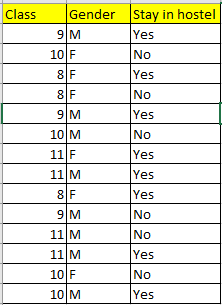PNG' width="200

Let's try and understand how the root node is selected by calcualting gini impurity. We will use the above mentioned data.

We have two features which we can use for nodes: "Class" and "Gender".
We will calculate gini impurity for each of the features and then select that feature which has least gini impurity.

Let's review the formula for calculating ginni impurity:

<img src='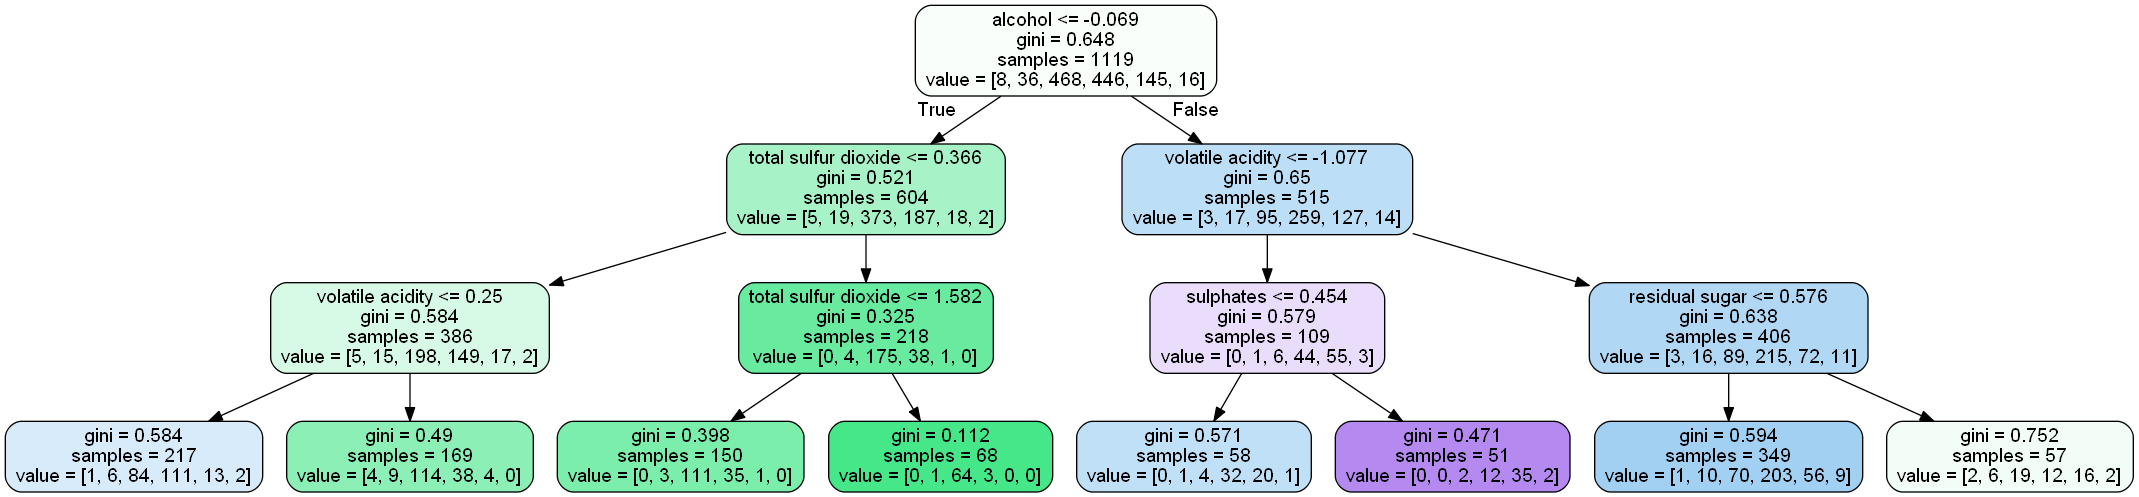ini.PNG' width="200">

Let's start with class, we will try to gini impurity for all different values in "<img src='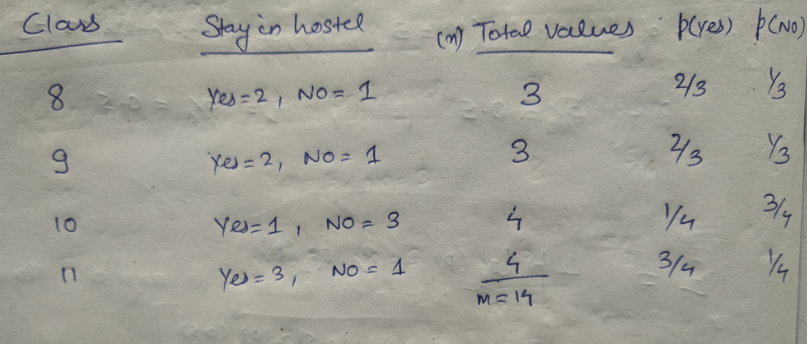ample/1.PNG' width="500">

<img src='example/2.PNG' width="500">

<img src='example/3.1.PNG' width="500">

<img src='example/3.PNG' width="500">

<img src='example/4.PNG' width="500">

<img src='example/5.PNG' width="500">

<img src='example/6.PNG' width="500">

<img src='example/7.PNG' width="500">

<img src='example/8.PNG' width="500">

This is how our Decision tree node is selected by calculating gini impurity for each node individually.
If the number of feautures increases, then we just need to repeat the same steps after t

### Different Algorithms for Decision Tree


* ID3 (Iterative Dichotomiser) : It is one of the algorithms used to construct decision tree for classification. It uses Information gain as the criteria for finding the root nodes and splitting them. It only accepts categorical attributes.

* C4.5 : It is an extension of ID3 algorithm, and better than ID3 as it deals both continuous and discreet values.It is also used for classfication purposes.


* Classfication and Regression Algorithm(CART) : It is the most popular algorithm used for constructing decison trees. It uses ginni impurity as the default calculation for selecting root nodes, however one can use "entropy" for criteria as well. This algorithm works on both regression as well as classfication problems. We will use this algorithm in our pyhton implementation.


Entropy and Ginni impurity can be used reversibly. It doesn't affects the result much. Although, ginni is easier to compute than entropy, since entropy has a log term calculation. That's why CART algorithm uses ginni as the default algorithm.

If we plot ginni vs entropy graph, we can see there is not much difference between them:

<img src="example/entropyVsGini.PNG" width = "400">

he selection of the root node.">is splitted on basis of ginni impurity value looks like:

<img src="tree_example.PNG" width="900">





### Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier        #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()             #object creation for decision tree
dt.fit(processed_x_train,y_train,sample_weight=sample_weights)       #train the model

# Validating the model

In [ ]:
y_predict=dt.predict(processed_x_test)    # predicting the model
acc=accuracy_score(y_test,y_predict)
acc


In [ ]:
f1_score(y_test,y_predict)    # Checking F1_Score

In [ ]:
print(classification_report(y_test,y_predict))              # it will give precision,recall,f1 scores and accuracy

# Hyperparameter Tunning of DicisionTree

## Hyperparameters of DecisionTree
* Hyperparameter tuning is searching the hyperparameter space for a set of values that will optimize your model architecture.


* Criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.


* Splitter: This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered.



* max_depth: This determines the maximum depth of the tree.  we use a depth of two to make our decision tree. ... This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting..The tree perfectly fits the training data and fails to generalize on testing data.



* min_samples_split:Ideal range is 1 to 40.min_samples_split specifies the minimum number of samples required to split an internal node, while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.



* min_samples_leaf: The minimum number of samples required to be at a leaf node.Similarr to min sample split ,this describes the minimum number of samples at the leaf,the base of tree.Ideal range is 1 to 20.(thershold value to make a decision)like 40


In [ ]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 10))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4,5,6,7],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier()                # object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=5)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(processed_x_train,y_train,sample_weight=sample_weights)    # training data on gridsearch cv
best_params = tree_cv.best_params_    # it will give you best parameters
print(f"Best paramters: {best_params})")   # printing  best parameters



In [ ]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Bestparamters: ({'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [ ]:
tree_cv.best_params_    # getting best parameters from cv

In [ ]:
# passing best parameter to decision tree
dt1=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf= 1,min_samples_split=2,splitter='best')

In [ ]:
# training model with best parameter
dt1.fit(processed_x_train,y_train,sample_weight=sample_weights)

In [ ]:
y_hat1=dt1.predict(processed_x_test) # predicting the model
y_hat1

In [ ]:
accuracy_score(y_test,y_hat1)     # Checking accuracy of model

In [ ]:
f1_score(y_test,y_hat1)     # Checking f1_Score

In [ ]:
print(classification_report(y_test,y_hat1)) # it will give precision,recall,f1 scores and accuracy

# Applying Random Forest

# what is random forest
* A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms.


* A random forest is a machine learning technique that’s used to solve regression and classification problems. It utilizes       ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.


* The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

**working of Random forest**
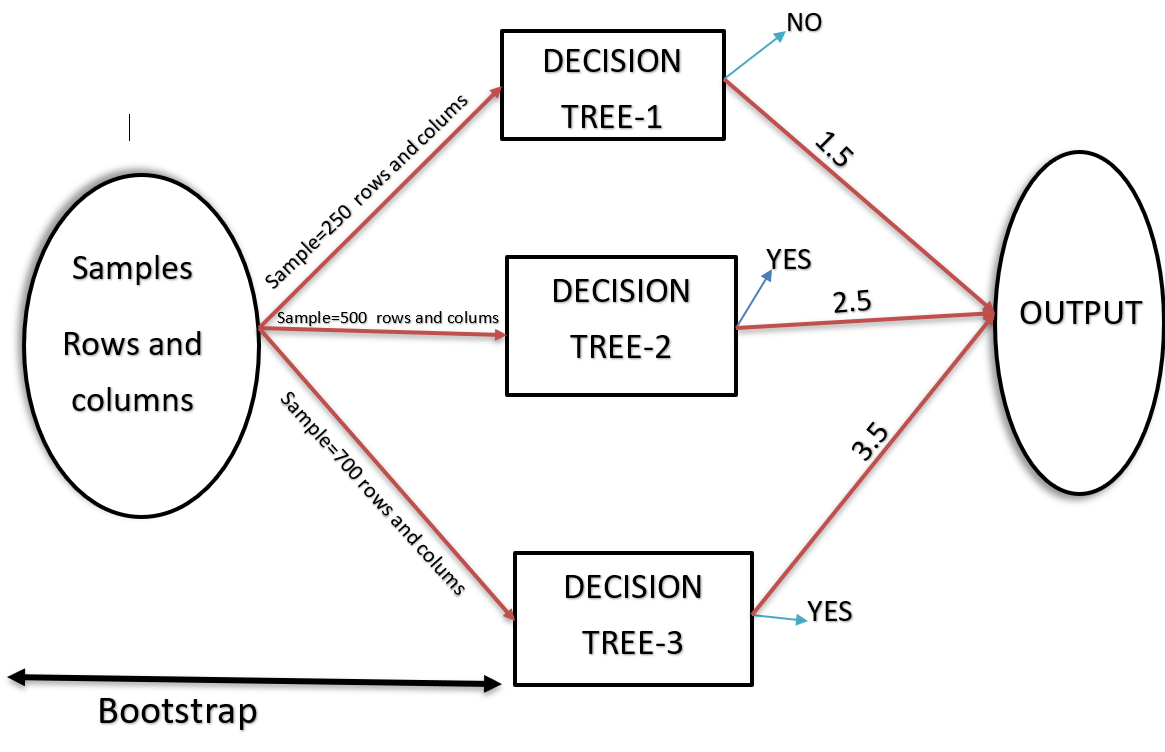

**Output side called as  Aggregation**


**What is bootstrap in random forest?**
* When training, each tree in a random forest learns from a random sample of the data points. The samples are drawn with replacement, known as bootstrapping, which means that some samples will be used multiple times in a single tree.




**For regression task it will take average**



**For classification it will count the output** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier   # importing randomforest

rf_clf = RandomForestClassifier() # Assigning RandomForest CLassifier into variable
rf_clf.fit(processed_x_train,y_train,sample_weight=sample_weights)   # training the data

# Validating The Model

In [ ]:
y_predict=rf_clf.predict(processed_x_test)   # testing the model

In [ ]:
accuracy_score(y_test,y_predict) # Checking the accuracy

In [ ]:
f1_score(y_test,y_predict)    # Checking the F1_Score

In [ ]:
print(classification_report(y_test,y_predict))   # it will give precision,recall,f1 scores and accuracy

# Hyperparameters Tunning of RandomForest

* n_estimators = number of trees in the foreset

* max_features =These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features

* max_depth =The depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information              about the data

* min_samples_split =the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node

* min_samples_leaf = minimum number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=5)]      # List Comprehension-using for loop in list
max_features = ['auto', 'sqrt','log2']        # maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=5)]            # List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [5, 10]          # minimum number of samples required to split an internal node
min_samples_leaf = [2, 4]              # minimum number of samples required to be at a leaf node.

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)   # Loading the model

rf_cv = GridSearchCV(estimator=rf_clf1, scoring='f1',param_grid= random_grid, cv=3,
                               verbose=2, n_jobs=-1)
# estimator--number of decision tree
# scoring--->performance matrix to check performance
# param_distribution-->hyperparametes(dictionary we created)
# n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
# cv------> number of flods
# verbose=Controls the verbosity: the higher, the more messages.
# n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(processed_x_train, y_train,sample_weight=sample_weights)      # training data on randomsearch cv
rf_best_params = rf_cv.best_params_       # it will give you best parameters
print(f"Best paramters: {rf_best_params})")   # printing  best parameters

In [ ]:
# passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators=200,min_samples_leaf=4,min_samples_split=20,max_features="log2",max_depth=10)
rf_clf2.fit(processed_x_train, y_train, sample_weight=sample_weights)  # train with tune parameters

In [ ]:
y_predict=rf_clf2.predict(processed_x_test)    # testing
accur=accuracy_score(y_test,y_predict)   # checking performance
accur

In [ ]:
f1_score=f1_score(y_test,y_predict) # checking performance with f1 Score

In [ ]:
f1_score

# What is GB and XGB ?
* XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. A wide range of applications: Can be used to solve regression, classification



* XGBoost is an implementation of gradient boosted decision trees designed for speed and performance



* Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made.



* Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.



* This approach supports both regression and classification predictive modeling problems.


## Decision tree,Bagging,Random forest,Boosting,Gradient Boosting,XGBoost
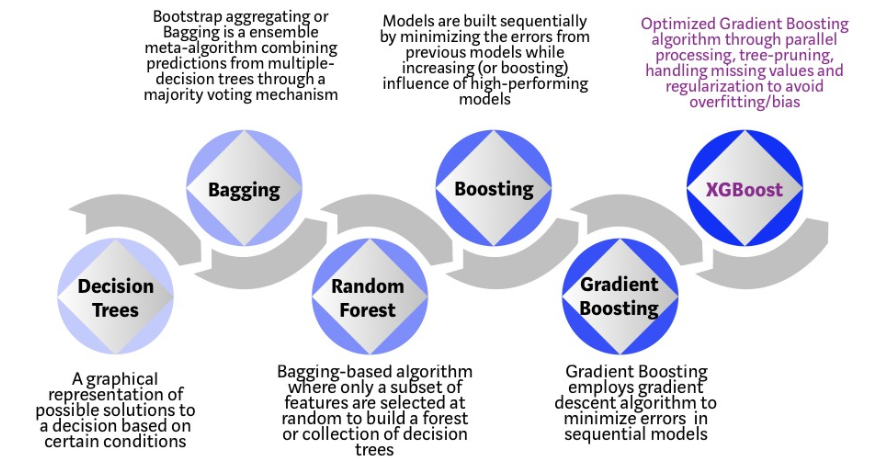


**Why does XGBoost perform so well?**
* XGBoost and Gradient Boosting Machines  are both ensemble tree methods that apply the principle of boosting weak           learners using the gradient descent architecture. However, XGBoost improves upon the base GBM frameworkthrough systems optimization and algorithmic enhancements.


#### 1.Regularization: 
* This is considered to be as a dominant factor of the algorithm. Regularization is a technique that is used to get rid of overfitting of the model. 

#### 2.Cross-Validation: 
* We use cross-validation by importing the function from sklearn but XGboost is enabled with inbuilt CV function.

#### 3.Missing Value:  
* It is designed in such a way that it can handle missing values. It finds out the trends in the missing values and apprehends them.

#### 4.Flexibility:
* It gives the support to objective functions. They are the function used to evaluate the performance of the model and also it can handle the user-defined validation metrics.



## System Optimization

#### Parallelization:
* XGBoost approaches the process of sequential tree building using parallelized implementation. This is possible due to the interchangeable nature of loops used for building base learners; the outer loop that enumerates the leaf nodes of a tree, and the second inner loop that calculates the features. This nesting of loops limits parallelization because without completing the inner loop (more computationally demanding of the two), the outer loop cannot be started. Therefore, to improve run time, the order of loops is interchanged using initialization through a global scan of all instances and sorting using parallel threads. This switch improves algorithmic performance by offsetting any parallelization overheads in computation.

#### Tree Pruning: 
* The stopping criterion for tree splitting within GBM framework is greedy in nature and depends on the negative loss criterion at the point of split. XGBoost uses ‘max_depth’ parameter as specified instead of criterion first, and starts pruning trees backward. This ‘depth-first’ approach improves computational performance significantly.


#### Hardware Optimization:
* This algorithm has been designed to make efficient use of hardware resources. This is accomplished by cache awareness by allocating internal buffers in each thread to store gradient statistics. Further enhancements such as ‘out-of-core’ computing optimize available disk space while handling big data-frames that do not fit into memory.









**When to Use XGBoost?**

* 1> When you have large number of observations in training data.**

* 2> Number features < number of observations in training data.**

* 3> It performs well when data has mixture numerical and categorical features or just numeric features.**

* 4> When the model performance metrics are to be considered.**

# Model Building

In [13]:
from sklearn.ensemble import GradientBoostingClassifier  # Importing GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(processed_x_train,y_train,sample_weight=sample_weights) ## fitting the data

GradientBoostingClassifier()

# Validating the model

### Processing the test data

In [14]:
processed_x_test = preprocessor.transform(x_test)   # Transform the test data using the preprocessor

In [15]:
y_gbm=gbm.predict(processed_x_test)     # Getting predictions from model
y_gbm

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Evaluating the model performance

In [16]:
# Importing the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report ,accuracy_score,f1_score

In [17]:
# Printing the classification report comparing the true labels (y_test) and the predicted labels (y_pred)
print(accuracy_score(y_test,y_gbm))  

0.8315217391304348


In [18]:
print(f1_score(y_test,y_gbm))   # Checking F1 Score

0.5694444444444444


In [19]:
print(classification_report(y_test,y_gbm))   # Displaying Classification Report

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       306
           1       0.50      0.66      0.57        62

    accuracy                           0.83       368
   macro avg       0.71      0.76      0.73       368
weighted avg       0.85      0.83      0.84       368



## Hyper Parameter Tuning Of Gradient Boosting

In [20]:
# Importing RandomizedSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Define Parameters grid for learning_rate, max_depth, n_estimators
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 65, 80, 100],
}
XGB=GradientBoostingClassifier()  # Assigning GradientBoostingClassifier model into variables

rcv= GridSearchCV(estimator=XGB, scoring='f1',refit = True,param_grid=param_grid, cv=5, 
                               verbose=2, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(processed_x_train,y_train,sample_weight=sample_weights)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 

Fitting 5 folds for each of 192 candidates, totalling 960 fits


Best paramters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.7})


In [ ]:
print(f"Best paramters: {cv_best_params})")##printing  best parameters"

In [ ]:
XGB2=GradientBoostingClassifier(n_estimators=50, max_depth=6, learning_rate=0.9)
XGB2.fit(processed_x_train,y_train,sample_weight=sample_weights)#training 

In [ ]:
y_predict=XGB2.predict(processed_x_test)#testing

In [ ]:
print(accuracy_score(y_test,y_predict))   #Checking Accuracy Score

In [ ]:
print(f1_score(y_test,y_predict))   #Checking Accuracy Score

In [ ]:
print(classification_report(y_test,y_predict))   # Displaying classification report

In [ ]:
# Opening a file named "model.pkl" in write-binary mode
# The 'wb' mode is used for writing binary data to the file
with open("model.pkl","wb") as f:
    pickle.dump(rcv,f)      # Using pickle to serialize and save the grid search object to the file

# Conclusions Of Gradient Boosting

* As we can see that the performance of model has increased significatly after applying Hyperparameter tuning.
* If you want to increase performance of model you can explore more.

# Applying XGBoost Model

### Model Building 

In [ ]:
!pip install xgboost  #installing model XGBOOST

In [ ]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(processed_x_train,y_train,sample_weight=sample_weights)# fitting the data
y_hat=xgb_r.predict(processed_x_test)#predicting the price

In [ ]:
print(accuracy_score(y_hat,y_test))   # Checking Accuracy Score

In [ ]:
print(f1_score(y_test,y_hat))   # Checking F1Score

In [ ]:
print(classification_report(y_test,y_hat))  # Checking Classification report

# Hyperparameter Tunning of XGBoost

https://www.youtube.com/watch?v=AvWfL1Us3Kg

For hyperparameter tuning

In [ ]:
# Importing RandomizedSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Define parameters grid for gamma, learning_Rate, max_depth, n_estimator, reg_alpha, reg_lamdba
param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)  # Assigning XGBClassifier model into variables
rcv= GridSearchCV(estimator=XGB, scoring='f1',refit=True,param_grid=param_grid,  cv=3, 
                               verbose=1, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(processed_x_train,y_train,sample_weight=sample_weights)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

In [ ]:
XGB2=XGBClassifier(reg_lambda= 0, reg_alpha= 0.2, n_estimators=50, max_depth=5, learning_rate=0.1, gamma=0.4)
XGB2.fit(processed_x_train,y_train,sample_weight=sample_weights)#training 
y_predict=XGB2.predict(processed_x_test)#testing

In [ ]:
accuracy=accuracy_score(y_predict,y_test)#checking performance

In [ ]:
accuracy

In [ ]:
f1score=f1_score(y_predict,y_test)#checking performance

In [ ]:
f1score

In [ ]:
print(classification_report(y_predict,y_test))   # Checking classification report

## XGBoost
### Pros
1. Less feature engineering required (No need for scaling, normalizing data, can also handle missing values well)
2. Feature importance can be found out(it output importance of each feature, can be used for feature selection)
3. Fast to interpret
4. Outliers have minimal impact.
5. Handles large sized datasets well.
6. Good Execution speed
7. Good model performance (wins most of the Kaggle competitions)
8. Less prone to overfitting

### Cons
1. Difficult interpretation , visualization tough
2. Overfitting possible if parameters not tuned proper


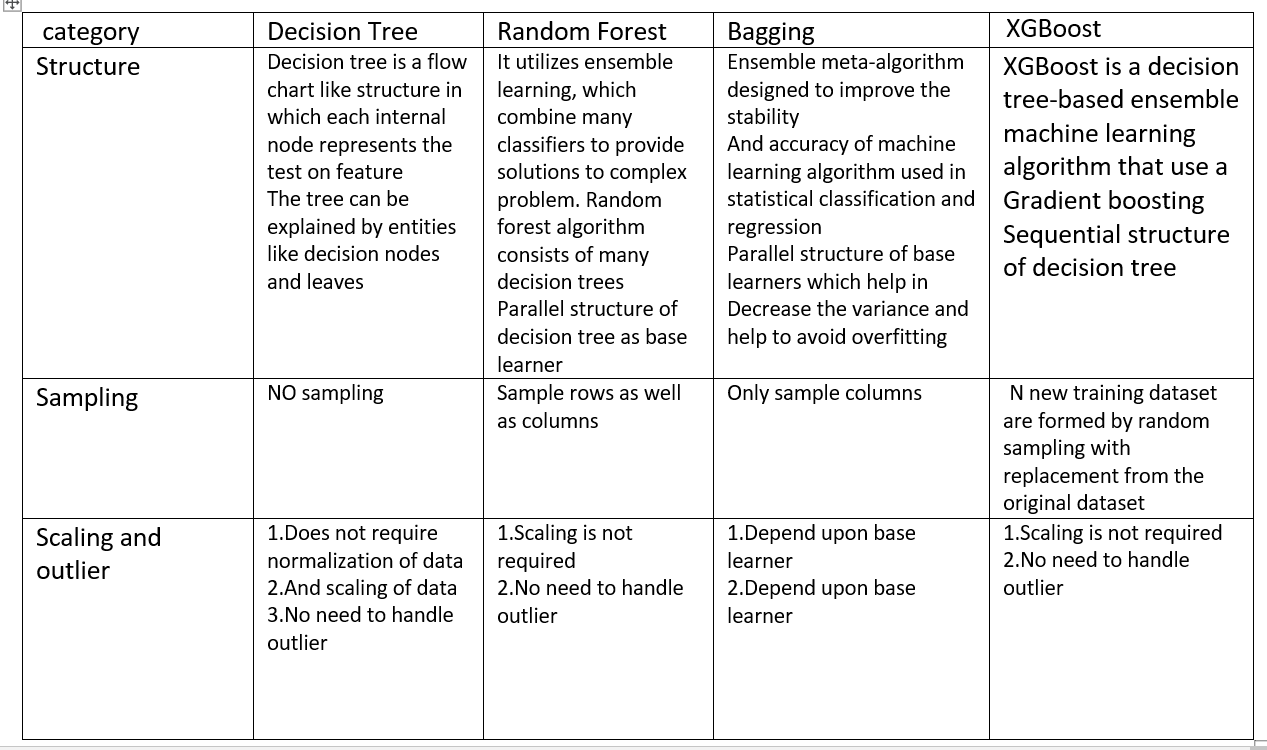

                                                 __!!!HAPPY LEARNING!!!__